### Using Bayesian neural nets

In [1]:
from bayesian_modeling.utils import nll_loss
from bayesian_modeling.models import BayesianNet
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

Generate data


In [20]:
x = tfd.Normal(tf.zeros([1000, 1]), tf.ones([1000, 1])).sample()
y = x ** 2 + tfd.Normal(tf.zeros([1000, 1]), 1 * tf.ones([1000, 1])).sample()

Create and train model

In [ ]:
model = BayesianNet(learning_rate=0.001, use_batchnorm=True, neurons_per_layer=16)
model.compile(loss=nll_loss)
model.fit(x, y, epochs=1000)

Plot results

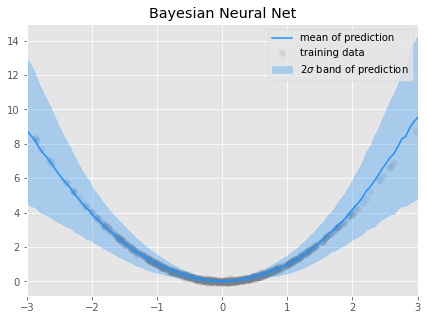

In [19]:
plt.style.use("ggplot")
x_pred = np.linspace(-3, 3, 100)
y_hat = np.squeeze(np.reshape(model(x_pred[:, None], n_samples=100), (5000, 100)))
y_hat_mu = np.mean(y_hat, axis=0)
y_hat_sigma = np.std(y_hat, axis=0)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x_pred, y_hat_mu, color="dodgerblue")
ax.scatter(x, y, color="gray", alpha=0.15)
ax.fill_between(
    x_pred,
    y_hat_mu - y_hat_sigma,
    y_hat_mu + y_hat_sigma,
    alpha=0.3,
    color="dodgerblue",
)
ax.set_xlim([-3, 3])
ax.set_title("Bayesian Neural Net")
ax.legend(["mean of prediction", "training data", r"$2\sigma$ band of prediction"])
fig.savefig("bnn.png", dpi=300)